<a href="https://colab.research.google.com/github/dtg-ca/DataScience-the-journey-begins/blob/master/NLP_tf_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
series = np.sin(0.1* np.arange(200)) + np.random.randn(200)*0.1
len(series)

200

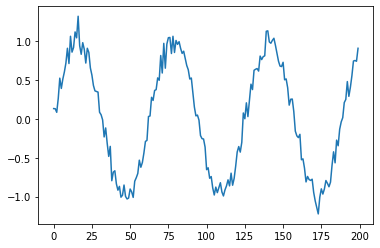

In [4]:
plt.plot(series)
plt.show()

In [5]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [6]:
type(series)

numpy.ndarray

In [7]:
series[0:10]

array([0.13225549, 0.13076973, 0.08421009, 0.2636651 , 0.52416426,
       0.39164751, 0.51350733, 0.60405485, 0.71902304, 0.90907395])

In [8]:
T = 10
X = []
Y = []
type(X), type(Y)

(list, list)

In [9]:
for t in range(len(series)-T):
  x = series [t : t+T]
  X.append(x)
  y = series [t + T]
  Y.append(y)

In [10]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
X.shape, Y.shape

((190, 10), (190,))

In [11]:
i = Input(shape= (T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile( 
             loss = 'mse',
             optimizer = Adam(lr =0.1)
             )
r = model. fit(
    X[:- N//2], Y[:-N//2],
    validation_data =( X[-N//2:],Y[-N//2:]),
    epochs = 80
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
3/3 [==============================] - 0s 68ms/step - loss: 0.2586 - val_loss: 0.2291
Epoch 2/80
3/3 [==============================] - 0s 16ms/step - loss: 0.1755 - val_loss: 0.0761
Epoch 3/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1436 - val_loss: 0.0899
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0720 - val_loss: 0.0747
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 0.1095 - val_loss: 0.0624
Epoch 6/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0398 - val_loss: 0.0414
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0653 - val_loss: 0.0358
Epoch 8/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0293 - val_loss: 0.0270
Epoch 9/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0449 - val_loss: 0.0263
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 11/80
3/3 [============

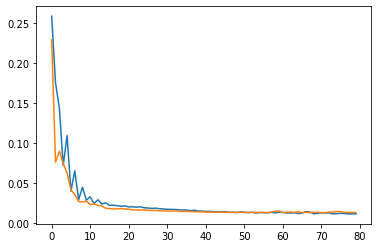

In [12]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

In [13]:
X[0]

array([0.13225549, 0.13076973, 0.08421009, 0.2636651 , 0.52416426,
       0.39164751, 0.51350733, 0.60405485, 0.71902304, 0.90907395])

In [14]:
X[0].reshape(1,-1)

array([[0.13225549, 0.13076973, 0.08421009, 0.2636651 , 0.52416426,
        0.39164751, 0.51350733, 0.60405485, 0.71902304, 0.90907395]])

In [15]:
np.roll(X[0], -2)

array([0.08421009, 0.2636651 , 0.52416426, 0.39164751, 0.51350733,
       0.60405485, 0.71902304, 0.90907395, 0.13225549, 0.13076973])

In [16]:
X[0,0]

0.13225548966756542

In [17]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i += 1
  validation_predictions.append(p)

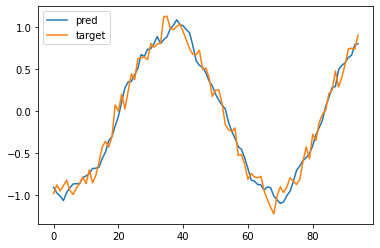

In [18]:
plt.plot(validation_predictions, label = 'pred')
plt.plot(validation_target, label = 'target')
plt.legend()

In [19]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

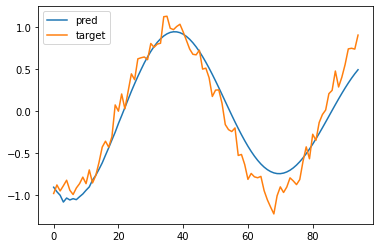

In [20]:
plt.plot(validation_predictions, label = 'pred')
plt.plot(validation_target, label = 'target')
plt.legend()